<b>E23CSEU0055 - Arihant Gupta</b>
<br>
<b>Lab 11 - Time Series Analysis</b>
<br>
10th Nov, 2025

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [22]:
df = pd.read_csv("ADANIPORTS.csv")
print("Dataset Head:")
print(df.head())

Dataset Head:
         Date      Symbol Series  Prev Close    Open     High    Low   Last  \
0  2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
1  2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2  2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
3  2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
4  2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.90  984.72  27294366  2.687719e+15     NaN             9859619   
1  893.90  941.38   4581338  4.312765e+14     NaN             1453278   
2  884.20  888.09   5124121  4.550658e+14     NaN             1069678   
3  921.55  929.17   4609762  4.283257e+14     NaN             1260913   
4  969.30  965.65   2977470  2.875200e+14     NaN              816123   

   %Deliverble  
0       0.3612  
1       0.3172  
2       0.2088  
3   

In [23]:
print("\nColumns present in dataset:", df.columns)

# Convert Date column to datetime and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values("Date")


Columns present in dataset: Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')


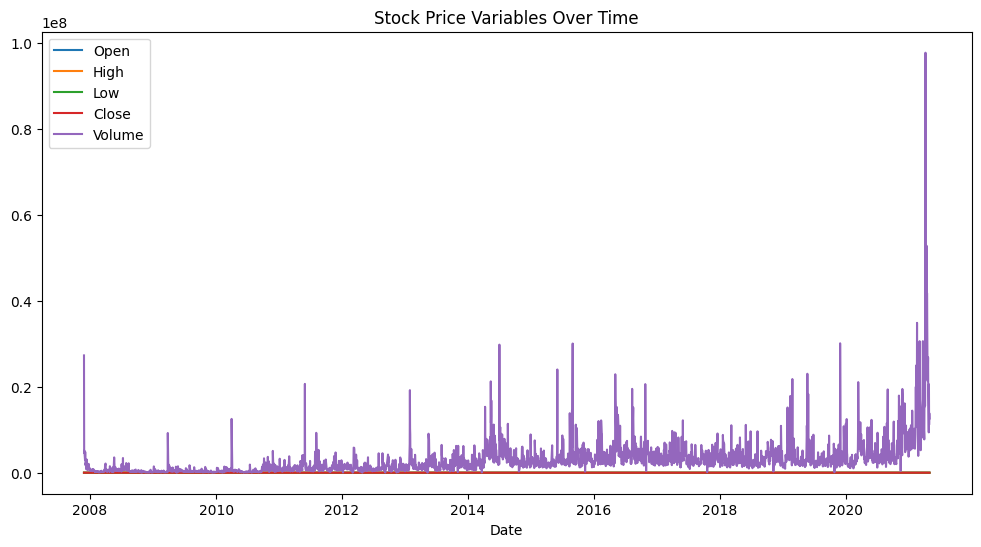

In [24]:
plt.figure(figsize=(12, 6))
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    plt.plot(df['Date'], df[col], label=col)
plt.title("Stock Price Variables Over Time")
plt.xlabel("Date")
plt.legend()
plt.show()

In [25]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
target_col = 'Close'

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[features])

scaled_df = pd.DataFrame(scaled_data, columns=features)

In [26]:
def create_dataset(data, target_col, time_steps=7):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data.iloc[i:i + time_steps].values)
        y.append(data.iloc[i + time_steps][target_col])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_df, target_col, 7)

print("Input shape:", X.shape)
print("Target shape:", y.shape)

Input shape: (3315, 7, 5)
Target shape: (3315,)


In [27]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = Sequential()
model.add(SimpleRNN(64, activation='tanh', return_sequences=False, input_shape=(7, len(features))))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()

history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.1, verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 64)             │         4,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,593 (25.75 KB)

 Trainable params: 6,593 (25.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0051 - val_loss: 7.4132e-05
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.9285e-04 - val_loss: 5.8554e-05
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.9471e-04 - val_loss: 1.4925e-04
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.6338e-04 - val_loss: 1.5014e-04
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.7174e-04 - val_loss: 5.6581e-04
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.5185e-04 - val_loss: 1.3250e-04
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.6463e-04 - val_loss: 1.2034e-04
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5656e-04 - val_loss: 7.1209e-05
Epoch 9/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0627e-04 - val_loss: 5.5607e-05
Epoch 10/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.2307e-04 - val_loss: 9.8471e-05
Epoch 11/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.

In [28]:
predicted = model.predict(X_test)

close_scaler = MinMaxScaler()
close_scaler.min_, close_scaler.scale_ = scaler.min_[features.index(target_col)], scaler.scale_[features.index(target_col)]
predicted_orig = (predicted - close_scaler.min_) / close_scaler.scale_
actual_orig = (y_test - close_scaler.min_) / close_scaler.scale_

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


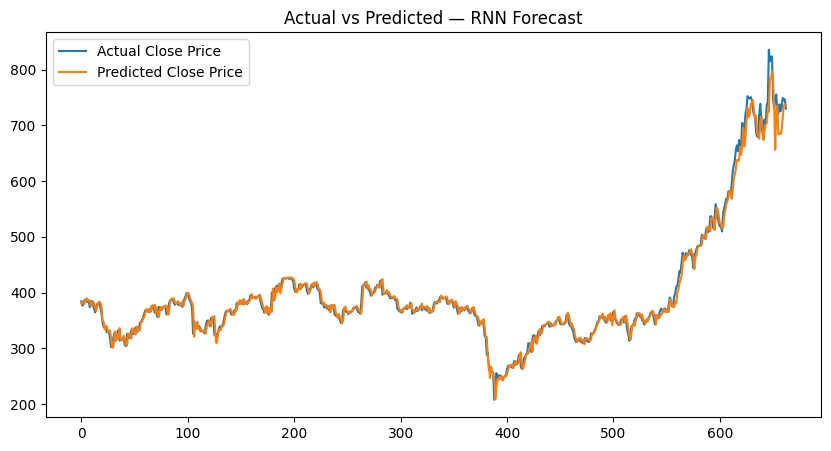

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(actual_orig, label="Actual Close Price")
plt.plot(predicted_orig, label="Predicted Close Price")
plt.title("Actual vs Predicted — RNN Forecast")
plt.legend()
plt.show()

In [30]:
print("RMSE:", np.sqrt(mean_squared_error(actual_orig, predicted_orig)))
print("MAE: ", mean_absolute_error(actual_orig, predicted_orig))
print("R² Score:", r2_score(actual_orig, predicted_orig))

RMSE: 12.720941093610936
MAE:  7.944950515935327
R² Score: 0.9861185054077745
